In [1]:
# Data Source - https://fred.stlouisfed.org/series/IPG2211A2N

In [61]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
data = pd.read_csv("Electric_Production.csv",index_col=0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [62]:
# We now convert this data into a time series data. Currently the date values are stored as string type.

In [63]:
data.index

Index(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01', '1939-05-01',
       '1939-06-01', '1939-07-01', '1939-08-01', '1939-09-01', '1939-10-01',
       ...
       '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
       '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01'],
      dtype='object', name='DATE', length=954)

In [64]:
data.index = pd.to_datetime(data.index)


In [65]:
data.head()


,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [66]:
data.index


DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01'],
              dtype='datetime64[ns]', name='DATE', length=954, freq=None)

In [67]:
# Check for missing data

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 954 entries, 1939-01-01 to 2018-06-01
Data columns (total 1 columns):
IPG2211A2N    954 non-null float64
dtypes: float64(1)
memory usage: 14.9 KB


In [69]:
# Rename column for ease

In [70]:
data.columns = ['energy_prod']


In [71]:
data.head()


,energy_prod
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid



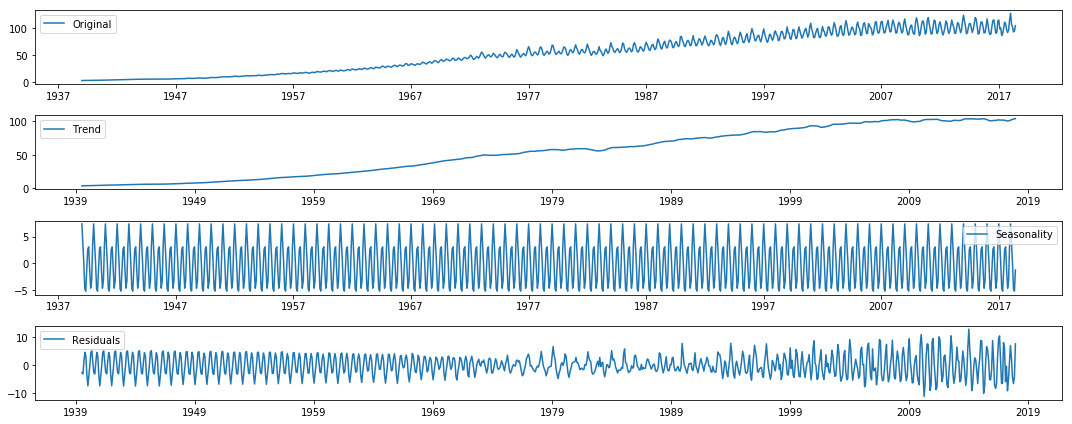

In [73]:
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



In [75]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3731.023, BIC=3755.326, Fit time=2.414 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4050.138, BIC=4069.580, Fit time=0.867 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3852.302, BIC=3871.745, Fit time=1.041 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3730.477, BIC=3759.641, Fit time=2.714 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=3892.231, BIC=3916.535, Fit time=1.834 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3724.200, BIC=3758.225, Fit time=13.216 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3846.222, BIC=3875.386, Fit time=5.474 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3721.004, BIC=3759.890, Fit time=16.546 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_or

In [76]:
stepwise_model.aic()


3700.3086893806244

In [77]:
# Convert data to stationary time series

data2 = np.log(data)

In [78]:
# Train Test Split Data

In [79]:
data2.head()


,energy_prod
DATE,
1939-01-01,1.219118
1939-02-01,1.226712
1939-03-01,1.249185
1939-04-01,1.256556
1939-05-01,1.256556


In [80]:
data2.tail()

,energy_prod
DATE,
2018-02-01,4.672881
2018-03-01,4.638972
2018-04-01,4.534820
2018-05-01,4.548848
2018-06-01,4.652571


In [81]:
train = data2.loc['1939-01-01':'2016-12-01']


In [82]:
train.tail()


,energy_prod
DATE,
2016-08-01,4.749101
2016-09-01,4.626763
2016-10-01,4.507477
2016-11-01,4.524756
2016-12-01,4.729683


In [83]:
test = data2.loc['2016-01-01':]


In [84]:
test.head()


,energy_prod
DATE,
2016-01-01,4.763991
2016-02-01,4.665832
2016-03-01,4.548298
2016-04-01,4.481619
2016-05-01,4.495620


In [85]:
test.tail()


,energy_prod
DATE,
2018-02-01,4.672881
2018-03-01,4.638972
2018-04-01,4.534820
2018-05-01,4.548848
2018-06-01,4.652571


In [86]:
len(test)


30

In [87]:
stepwise_model.fit(train)


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [88]:
future_forecast = stepwise_model.predict(n_periods=30)


In [89]:
future_forecast


array([ 4.81902648,  4.71864195,  4.62027334,  4.51082706,  4.52818157,
        4.64957452,  4.73857124,  4.73682325,  4.63032021,  4.52919588,
        4.56216349,  4.71663902,  4.80703153,  4.72338116,  4.6283769 ,
        4.51381609,  4.53142241,  4.65158364,  4.73975448,  4.73571794,
        4.63229239,  4.53226792,  4.5646665 ,  4.71072043,  4.80430467,
        4.71983796,  4.62377489,  4.51310769,  4.53059681,  4.65195309])

In [90]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

future_forecast.head()


,Prediction
DATE,
2016-01-01,4.819026
2016-02-01,4.718642
2016-03-01,4.620273
2016-04-01,4.510827
2016-05-01,4.528182


In [91]:
test.head()


,energy_prod
DATE,
2016-01-01,4.763991
2016-02-01,4.665832
2016-03-01,4.548298
2016-04-01,4.481619
2016-05-01,4.495620


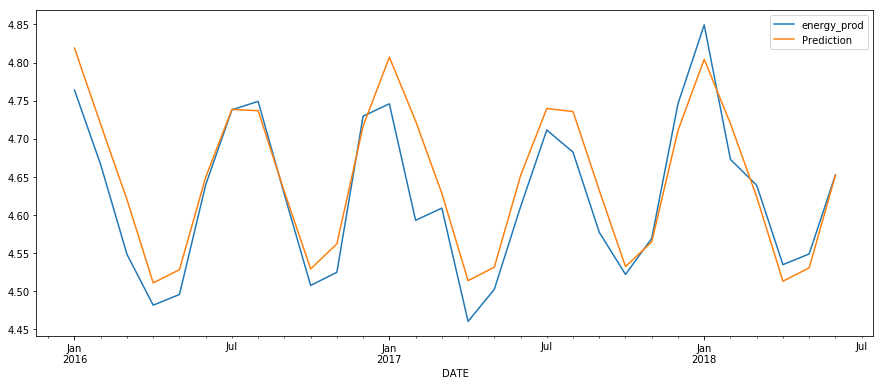

In [92]:
pd.concat([test,future_forecast],axis=1).plot()


In [93]:
future_forecast2 = np.exp(future_forecast)


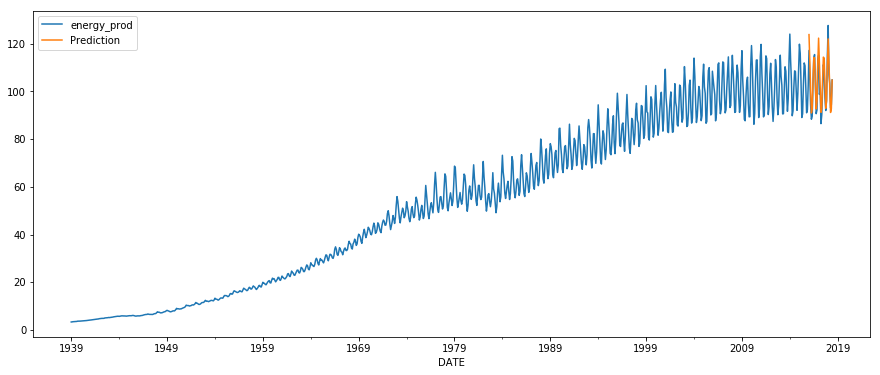

In [94]:
pd.concat([data,future_forecast2],axis=1).plot()


In [ ]:
#Check r2 score for accuracy of prediction

In [96]:
from sklearn.metrics import r2_score
r2_score(np.exp(test),future_forecast2)

0.80481252772137712